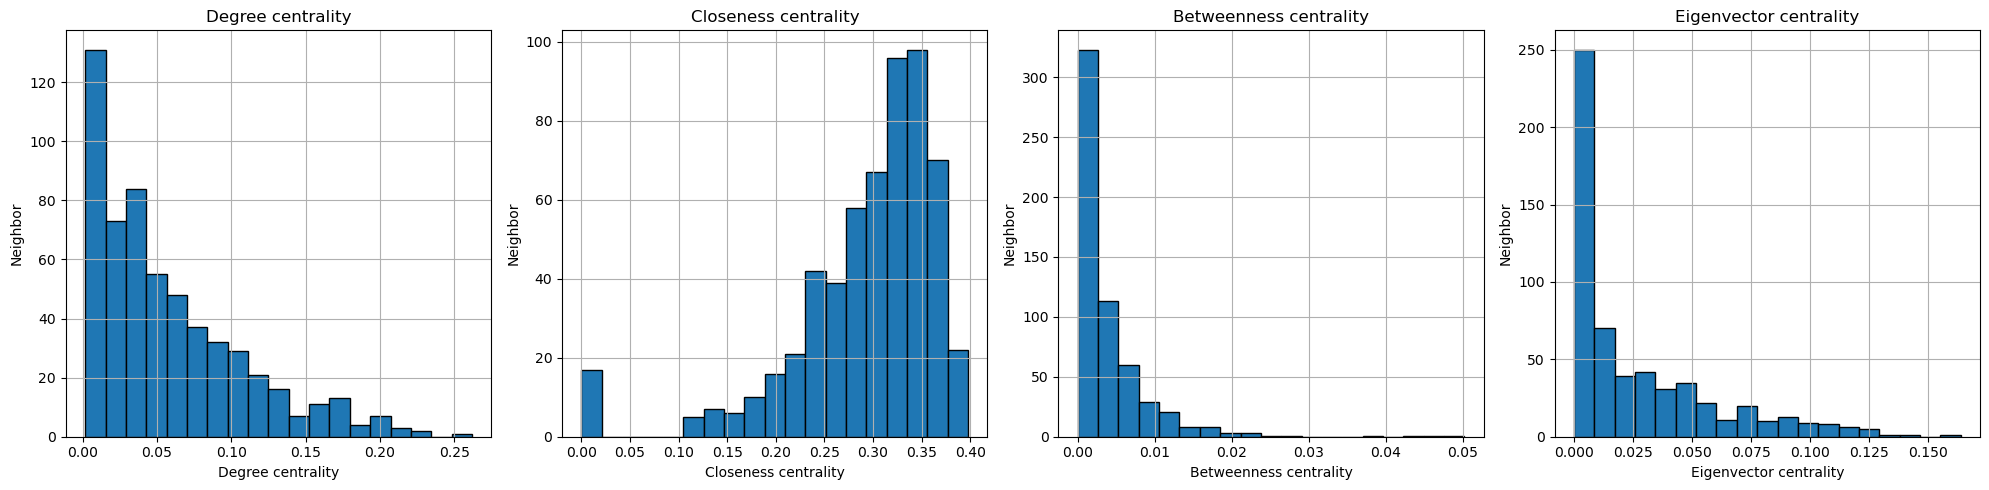

In [15]:
##### import os
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
graph_path = r"C:\Users\NICK\NS Project\1week_bike_network.gml"
graph = nx.read_gml(graph_path)
degree_centrality = nx.degree_centrality(graph)
closeness_centrality = nx.closeness_centrality(graph)
betweenness_centrality = nx.betweenness_centrality(graph)
eigenvector_centrality = nx.eigenvector_centrality(graph)

fig, axes = plt.subplots(1, 4, figsize=(20, 5))
centrality_data1 = [
    (degree_centrality, "Degree centrality"),
    (closeness_centrality, "Closeness centrality"),
    (betweenness_centrality, "Betweenness centrality"),
    (eigenvector_centrality, "Eigenvector centrality")
]

for i, (cen_values1, title1) in enumerate(centrality_data1):
    values = list(cen_values1.values())
    axes[i].hist(values, bins=np.linspace(min(values), max(values), 20), edgecolor='black')
    axes[i].set_title(title1)
    axes[i].set_xlabel(f"{title1}")
    axes[i].set_ylabel("Neighbor")
    axes[i].grid(True)

plt.tight_layout()
plt.show()

1. Degree Centrality
2. Closeness Centrality
3. Betweenness Centrality
4. Eigenvector Centrality

In [25]:
import networkx as nx
import pandas as pd

file_path = r"C:\Users\NICK\NS Project\1week_bike_network.gml"
G = nx.read_gml(file_path)
is_directed = nx.is_directed(G)
if is_directed:
    pagerank_scores = nx.pagerank(G)
else:
    pagerank_scores = nx.pagerank(nx.DiGraph(G))  # Convert to directed graph for PageRank

pagerank_df = pd.DataFrame(
    sorted(pagerank_scores.items(), key=lambda item: item[1], reverse=True),
    columns=["Node", "PageRank"]
)

top_10_pagerank = pagerank_df.head(10)
betweenness_centrality = nx.betweenness_centrality(G)
betweenness_df = pd.DataFrame(
    sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True),
    columns=["Node", "Betweenness"]
)

top_10_betweenness = betweenness_df.head(10)
merged_top_10 = pd.merge(
    top_10_pagerank,
    top_10_betweenness,
    on="Node",
    how="outer"
).fillna(0) 
merged_top_10.to_csv('top_10_pagerank_betweenness.csv', index=False)
print("Top 10 Nodes by PageRank and Betweenness Centrality:")
print(merged_top_10)



Top 10 Nodes by PageRank and Betweenness Centrality:
                          Node  PageRank  Betweenness
0         Broadway & Barry Ave  0.005096     0.000000
1            Clark St & Elm St  0.006744     0.000000
2        Dearborn St & Erie St  0.005490     0.000000
3    Desplaines St & Kinzie St  0.006193     0.000000
4          Ellis Ave & 53rd St  0.000000     0.045845
5   Franklin St & Jackson Blvd  0.000000     0.022199
6        Green St & Madison St  0.000000     0.020052
7       Green St & Randolph St  0.000000     0.043047
8   Indiana Ave & Roosevelt Rd  0.005176     0.027533
9        Kimbark Ave & 53rd St  0.005493     0.037681
10     Lake Park Ave & 56th St  0.000000     0.022212
11        Paulina St & 18th St  0.000000     0.024440
12         Troy St & North Ave  0.000000     0.022405
13      Wabash Ave & Grand Ave  0.005453     0.000000
14   Wabash Ave & Roosevelt Rd  0.006676     0.050196
15     Wentworth Ave & 63rd St  0.005041     0.000000
16    Wilton Ave & Belmont Av

C:\Users\NICK\AppData\Local\Temp\ipykernel_60292\2197317698.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('tab10', len(top_10_nodes))


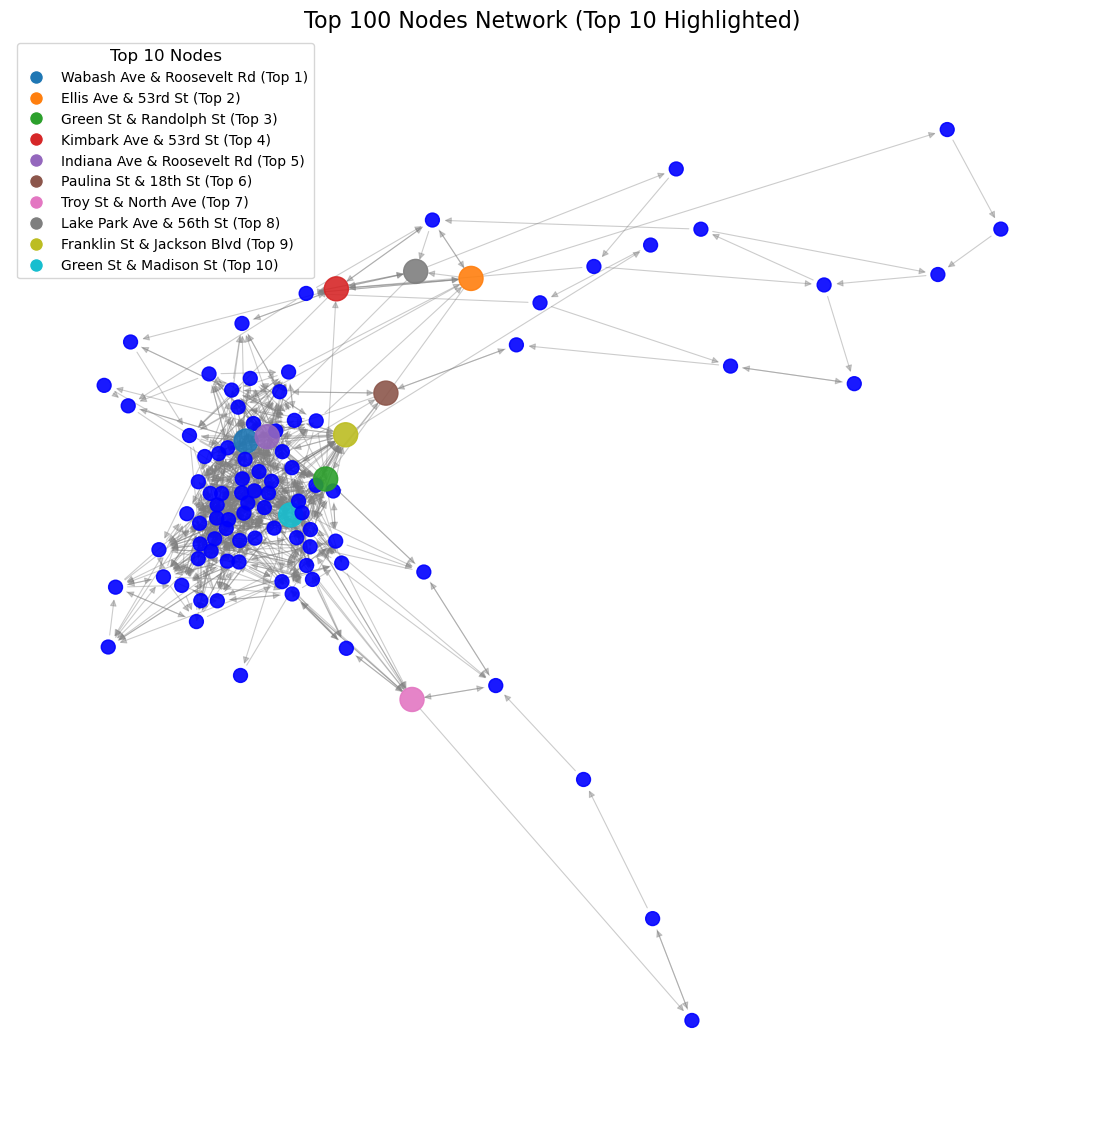

In [11]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

file_path = r"C:\Users\NICK\NS Project\1week_bike_network.gml"
G = nx.read_gml(file_path)
G_no_self_loops = G.copy()
G_no_self_loops.remove_edges_from(nx.selfloop_edges(G_no_self_loops))
degree_centrality = nx.betweenness_centrality(G_no_self_loops)
top_100_nodes = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:100]
top_100_subgraph_no_loops = G_no_self_loops.subgraph(top_100_nodes)
top_10_nodes = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:10]
color_map = cm.get_cmap('tab10', len(top_10_nodes))
top_10_colors = {node: color_map(i) for i, node in enumerate(top_10_nodes)}

node_colors = []
node_sizes = []
for node in top_100_subgraph_no_loops.nodes():
    if node in top_10_nodes:
        node_colors.append(top_10_colors[node])  
        node_sizes.append(300)  
    else:
        node_colors.append('blue')  
        node_sizes.append(100)  
plt.figure(figsize=(14, 14))
pos = nx.spring_layout(top_100_subgraph_no_loops, seed=42)  # Consistent layout
nx.draw_networkx_nodes(top_100_subgraph_no_loops, pos, node_size=node_sizes, node_color=node_colors, alpha=0.9)
nx.draw_networkx_edges(top_100_subgraph_no_loops, pos, alpha=0.4, edge_color='gray', width=0.8)
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=top_10_colors[node], markersize=10, label=f"{node} (Top {i+1})")
    for i, node in enumerate(top_10_nodes)
]
plt.legend(handles=legend_elements, loc='upper left', title='Top 10 Nodes', fontsize=10, title_fontsize=12)
plt.title("Top 100 Nodes Network (Top 10 Highlighted)", fontsize=16)
plt.axis('off')

# Show the plot
plt.show()



C:\Users\NICK\AppData\Local\Temp\ipykernel_60292\545581525.py:56: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('tab10', len(top_10_nodes))


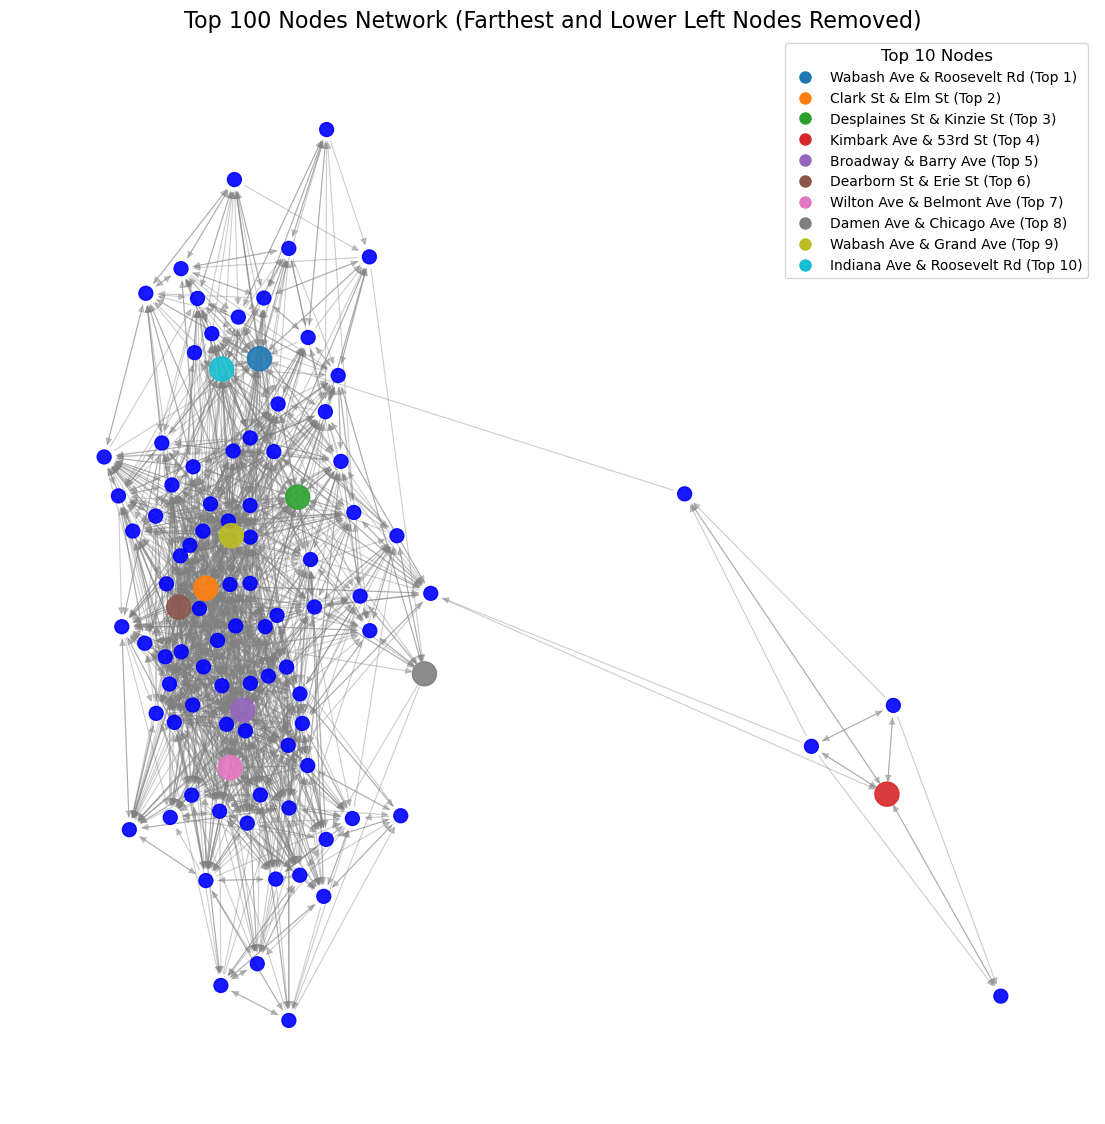

In [37]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

file_path = r"C:\Users\NICK\NS Project\1week_bike_network.gml"
G = nx.read_gml(file_path)
G_no_self_loops = G.copy()
G_no_self_loops.remove_edges_from(nx.selfloop_edges(G_no_self_loops))
all_pairs_shortest_path = dict(nx.all_pairs_shortest_path_length(G_no_self_loops))
max_distance = 0
farthest_nodes = (None, None)
for node1, paths in all_pairs_shortest_path.items():
    for node2, distance in paths.items():
        if distance > max_distance:
            max_distance = distance
            farthest_nodes = (node1, node2)

G_no_self_loops.remove_nodes_from(farthest_nodes)
pagerank_centrality = nx.pagerank(G_no_self_loops)
top_100_nodes = sorted(pagerank_centrality, key=pagerank_centrality.get, reverse=True)[:100]
top_100_subgraph_mutable = G_no_self_loops.subgraph(top_100_nodes).copy()
pos = nx.spring_layout(top_100_subgraph_mutable, seed=42)
x_coords = [pos[node][0] for node in pos]
y_coords = [pos[node][1] for node in pos]
threshold_x = np.percentile(x_coords, 5) 
threshold_y = np.percentile(y_coords, 5) 
lower_left_nodes = [node for node in pos if pos[node][0] < threshold_x and pos[node][1] < threshold_y]
top_100_subgraph_mutable.remove_nodes_from(lower_left_nodes)
pos = nx.spring_layout(top_100_subgraph_mutable, seed=42)
top_10_nodes = sorted(top_100_nodes, key=lambda x: pagerank_centrality[x], reverse=True)[:10]
color_map = cm.get_cmap('tab10', len(top_10_nodes))
top_10_colors = {node: color_map(i) for i, node in enumerate(top_10_nodes)}

node_colors = []
node_sizes = []
for node in top_100_subgraph_mutable.nodes():
    if node in top_10_nodes:
        node_colors.append(top_10_colors.get(node, 'blue')) 
        node_sizes.append(300)
    else:
        node_colors.append('blue') 
        node_sizes.append(100)  

plt.figure(figsize=(14, 14))

nx.draw_networkx_nodes(top_100_subgraph_mutable, pos, node_size=node_sizes, node_color=node_colors, alpha=0.9)
nx.draw_networkx_edges(top_100_subgraph_mutable, pos, alpha=0.4, edge_color='gray', width=0.8)
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=top_10_colors.get(node, 'blue'), markersize=10, label=f"{node} (Top {i+1})")
    for i, node in enumerate(top_10_nodes) if node in top_100_subgraph_mutable.nodes()
]
plt.legend(handles=legend_elements, loc='upper right', title='Top 10 Nodes', fontsize=10, title_fontsize=12)
plt.title("Top 100 Nodes Network (Farthest and Lower Left Nodes Removed)", fontsize=16)
plt.axis('off')
plt.show()
 




In [39]:
file_path = r"C:\Users\NICK\NS Project\1week_bike_network.gml"
G = nx.read_gml(file_path)
edge_betweenness = nx.edge_betweenness_centrality(G)
sorted_edges = sorted(edge_betweenness.items(), key=lambda x: x[1], reverse=True)
top_central_paths = sorted_edges[:10]
top_central_paths

[(('Hoyne Ave & 47th St', 'Paulina St & 18th St'), 0.01896678648889296),
 (('Stony Island Ave & 71st St', 'Hoyne Ave & 47th St'), 0.017259242236230633),
 (('Green St & Randolph St', 'Kimbark Ave & 53rd St'), 0.015596036093750446),
 (('Ellis Ave & 53rd St', 'Green St & Randolph St'), 0.01427659727318934),
 (('Lake Park Ave & 56th St', 'Wabash Ave & Roosevelt Rd'),
  0.013787731001586808),
 (('Troy St & North Ave', 'Central Ave & Chicago Ave'), 0.012532608497363956),
 (('Stony Island Ave & 75th St', 'Stony Island Ave & 71st St'),
  0.01222243461719294),
 (('Central Ave & Lake St', 'Laramie Ave & Kinzie St'), 0.011673835670174744),
 (('Michigan Ave & 18th St', 'Ellis Ave & 53rd St'), 0.011634766297289427),
 (('Dorchester Ave & 63rd St', 'Stony Island Ave & 64th St'),
  0.01085732189759609)]

In [ ]:
关键路径指标
edge betweenness centrality

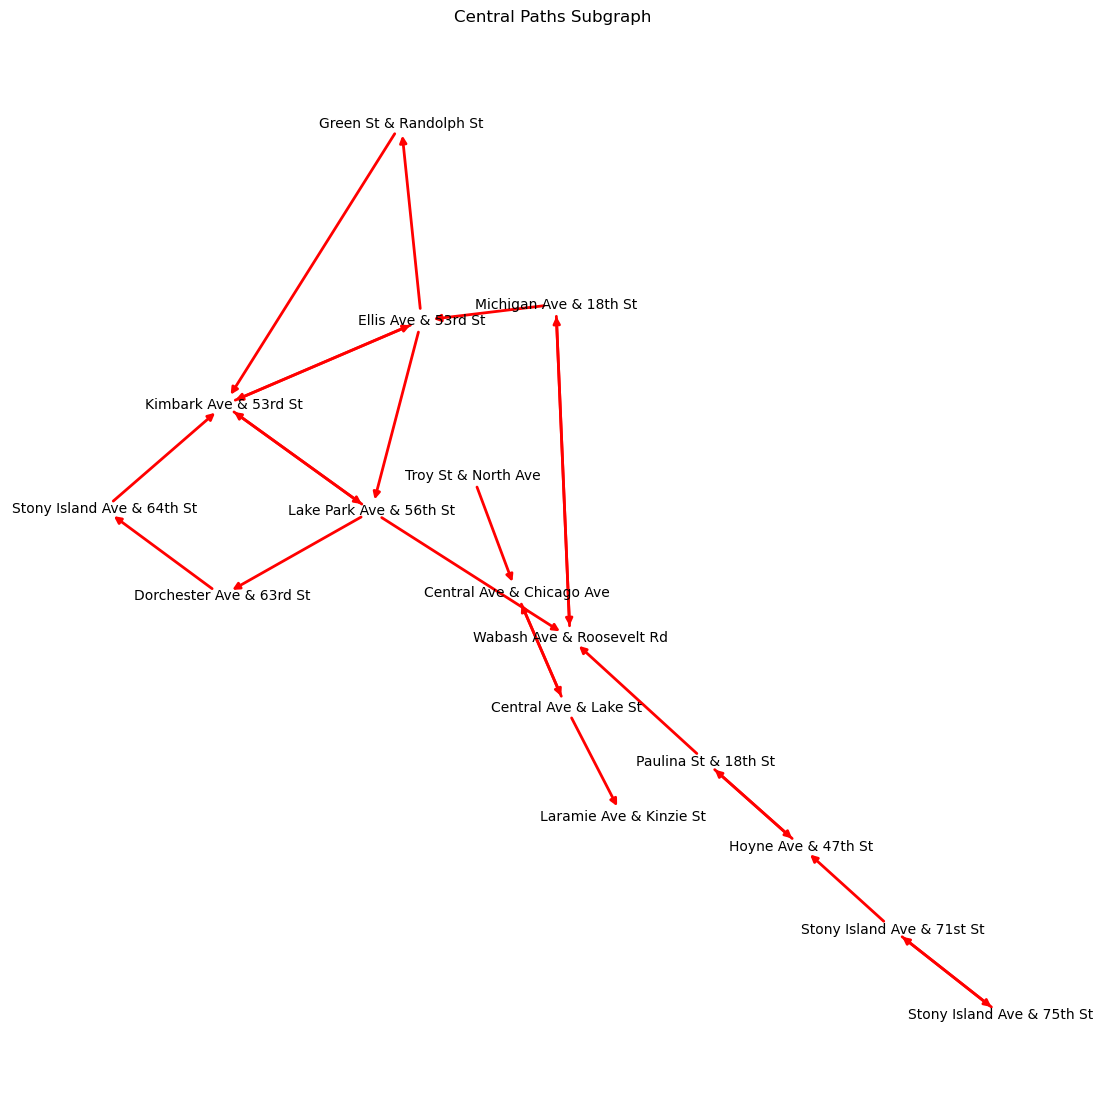

In [43]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

file_path = r"C:\Users\NICK\NS Project\1week_bike_network.gml"
G = nx.read_gml(file_path)
edge_betweenness = nx.edge_betweenness_centrality(G)
sorted_edges = sorted(edge_betweenness.items(), key=lambda x: x[1], reverse=True)
top_central_paths = sorted_edges[:10]
central_nodes = set()
for edge, _ in top_central_paths:
    central_nodes.update(edge)
subgraph = G.subgraph(central_nodes)
subgraph_no_loops = nx.DiGraph(subgraph)
subgraph_no_loops.remove_edges_from(nx.selfloop_edges(subgraph_no_loops))
adjusted_pos = nx.kamada_kawai_layout(subgraph_no_loops) 
plt.figure(figsize=(14, 14))
nx.draw_networkx_edges(subgraph_no_loops, adjusted_pos, edge_color="red", width=2)
nx.draw_networkx_labels(subgraph_no_loops, adjusted_pos, font_size=10, font_color="black")

plt.title("Central Paths Subgraph")
plt.axis("off")
plt.show()
